# Machine Learning Prediction Of Employee Turnover

In [1]:
import pandas as pd
df=pd.read_csv("dataset.csv")

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('dataset.csv') #Reading the csv file and storing the data in "dataFrame" variable
df.head() #It displays the top 5 data in a dataset
df.tail()
df.shape
df.columns
df.isna().sum()
df.duplicated(keep="first").sum()
df.drop_duplicates(inplace=True)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


## Exploratory Data Analysis

### Monthly Hours

In [4]:
df["average_montly_hours"].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [5]:
bins = len(df["average_montly_hours"].unique())
bins

215

In [6]:
sns.histplot??

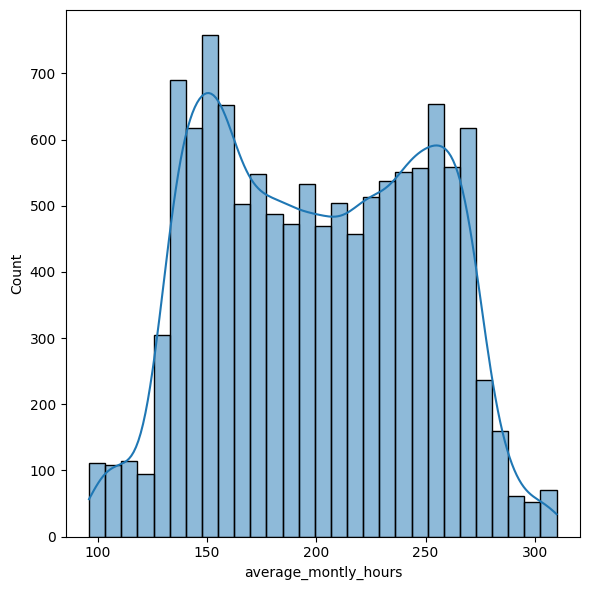

In [7]:
plt.figure(figsize=(6, 6))
sns.histplot(data = df, x = df["average_montly_hours"], kde=True)
plt.tight_layout()
plt.show()

### Number Of Projects

In [8]:
df["number_project"].value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

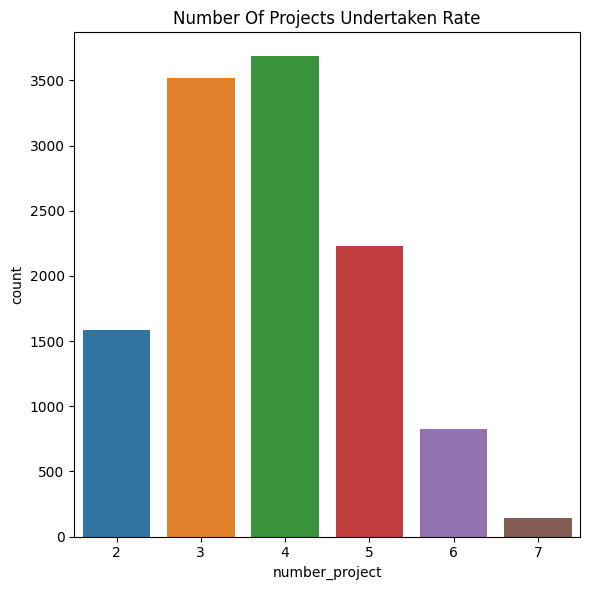

In [9]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="number_project")
plt.title("Number Of Projects Undertaken Rate")
plt.tight_layout()
plt.show()

### Promotion Made In The Last 5 Years

In [10]:
df["promotion_last_5years"].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [11]:
labels = df["promotion_last_5years"].value_counts().index.tolist()
labels

[0, 1]

In [12]:
labels = ["Promoted" if i == 1 else "Not Promoted" for i in labels]
labels

['Not Promoted', 'Promoted']

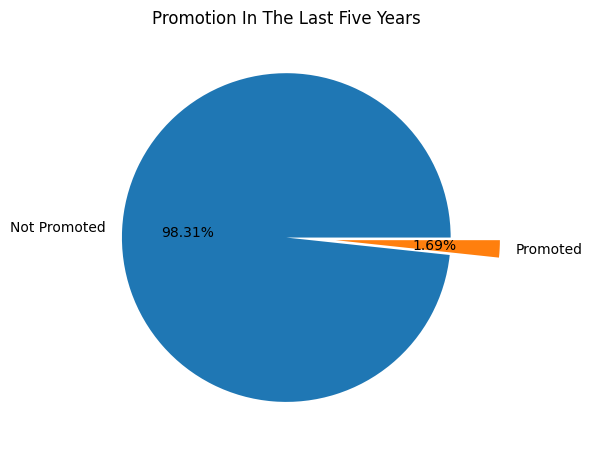

In [13]:
plt.figure(figsize=(6, 6))
plt.pie(x = df["promotion_last_5years"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion In The Last Five Years")
plt.tight_layout()
plt.show()

### Work Accidents

In [14]:
df["Work_accident"].value_counts()

0    10141
1     1850
Name: Work_accident, dtype: int64

In [15]:
labels = df["Work_accident"].value_counts().index.tolist()
labels

[0, 1]

In [16]:
labels = ["Work Accident" if i == 1 else "No Work Accident" for i in labels]
labels

['No Work Accident', 'Work Accident']

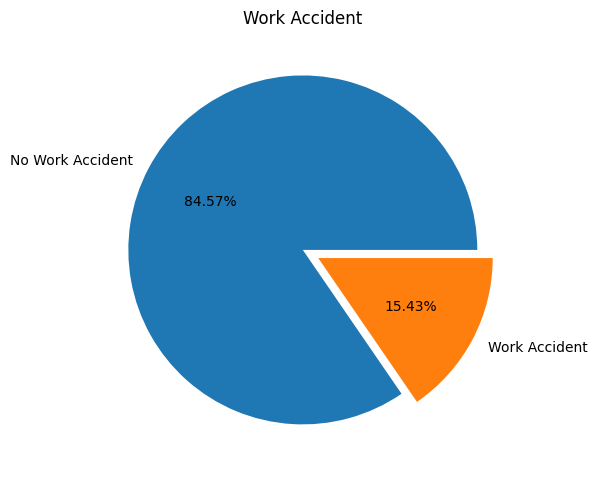

In [17]:
plt.figure(figsize=(6, 6))
plt.pie(x = df["Work_accident"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.1])
plt.title("Work Accident")
plt.tight_layout()
plt.show()

### Time Spent In Company

In [18]:
df["time_spend_company"].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

In [19]:
labels = df["time_spend_company"].value_counts().index.tolist()
labels

[3, 2, 4, 5, 6, 10, 7, 8]

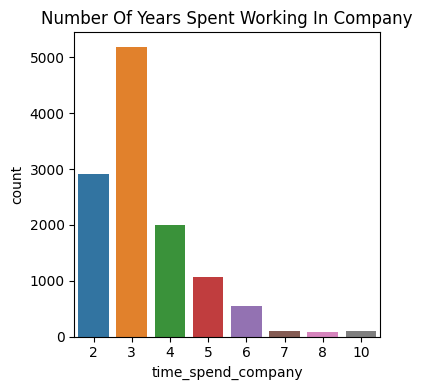

In [20]:
plt.figure(figsize=(4, 4))
sns.countplot(x = "time_spend_company", data=df)
plt.title("Number Of Years Spent Working In Company")
plt.tight_layout()
plt.show()

In [21]:
df["time_spend_company"].mean()

3.3648569760653824

### Department Comparison

In [22]:
df["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [23]:
df["sales"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: sales, dtype: int64

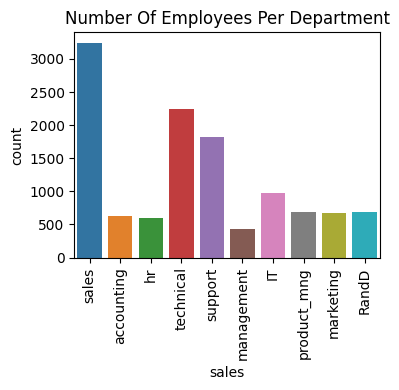

In [24]:
plt.figure(figsize=(4, 4))
sns.countplot(x = "sales", data=df)
plt.title("Number Of Employees Per Department")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [25]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [26]:
df["salary"].value_counts()

low       5740
medium    5261
high       990
Name: salary, dtype: int64

In [27]:
labels = df["salary"].value_counts().index.tolist()
labels

['low', 'medium', 'high']

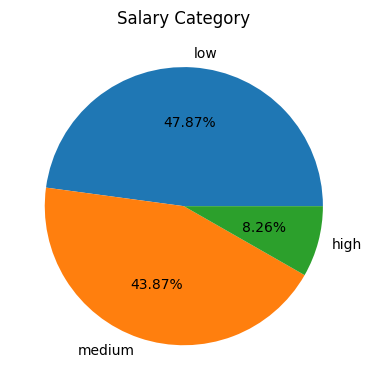

In [28]:
plt.figure(figsize=(4, 4))
plt.pie(x = df["salary"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Category")
plt.tight_layout()
plt.show()

## Data Preprocessing

In [29]:
df.rename(columns={"sales": "department", "salary_leve": "salary_level"}, inplace=True)

In [30]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Categorical Encoding

In [31]:
categorical_cols = ["department", "salary"]
encoded_cols = pd.get_dummies(df[categorical_cols], prefix="cat")

In [32]:
encoded_cols

,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,0,1,0,0,0,0,0,1,0,0
11996,0,0,0,0,1,0,0,0,0,0,1,0,0
11997,0,0,0,0,1,0,0,0,0,0,1,0,0
11998,0,0,0,0,0,1,0,0,0,0,1,0,0


In [33]:
df = df.join(encoded_cols)

In [34]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [35]:
df.drop(["department", "salary"], inplace=True, axis="columns")

In [36]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'cat_IT', 'cat_RandD', 'cat_accounting',
       'cat_hr', 'cat_management', 'cat_marketing', 'cat_product_mng',
       'cat_sales', 'cat_support', 'cat_technical', 'cat_high', 'cat_low',
       'cat_medium'],
      dtype='object')

### Min Max Scaling

In [37]:
df["average_montly_hours"].min()

96

In [38]:
df["average_montly_hours"].max()

310

### Split Data Into Train and Test

In [39]:
X = df.drop("left", axis=1)
y = df["left"]

In [40]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [41]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [44]:
X_train.shape

(9592, 20)

In [45]:
X_test.shape

(2399, 20)

## Train Model

### Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
logReg = LogisticRegression(max_iter=2000)

In [48]:
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [49]:
logReg_predictions = logReg.predict(X_test)

In [50]:
accuracy_score(y_test, logReg_predictions)

0.8378491037932472

In [51]:
print(classification_report(y_test, logReg_predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2000
           1       0.53      0.23      0.32       399

    accuracy                           0.84      2399
   macro avg       0.70      0.59      0.61      2399
weighted avg       0.81      0.84      0.81      2399



In [52]:
cm = confusion_matrix(y_test, logReg_predictions)

In [53]:
cm

array([[1918,   82],
       [ 307,   92]])

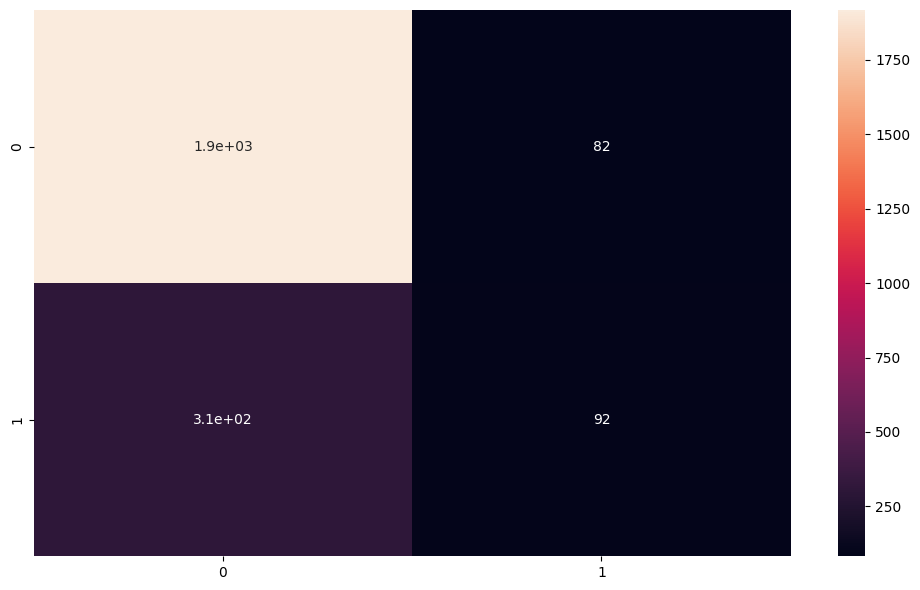

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

In [55]:
column_names = df.columns
print(column_names)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'cat_IT', 'cat_RandD', 'cat_accounting',
       'cat_hr', 'cat_management', 'cat_marketing', 'cat_product_mng',
       'cat_sales', 'cat_support', 'cat_technical', 'cat_high', 'cat_low',
       'cat_medium'],
      dtype='object')


In [56]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your DataFrame with the provided columns
# Drop any irrelevant columns (e.g., employee IDs) and the target variable 'left' if it's included in the features
X = df.drop(['left'], axis=1)
y = df['left']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
knn_model = KNeighborsClassifier(n_neighbors=5)  # Set the appropriate value for 'n_neighbors'
knn_model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9508128386827845
Confusion Matrix:
[[1933   65]
 [  53  348]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1998
           1       0.84      0.87      0.86       401

    accuracy                           0.95      2399
   macro avg       0.91      0.92      0.91      2399
weighted avg       0.95      0.95      0.95      2399



In [57]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your DataFrame with the provided columns
# Drop any irrelevant columns (e.g., employee IDs) and the target variable 'left' if it's included in the features
X = df.drop(['left'], axis=1)
y = df['left']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (important for some Naive Bayes variants, but not for GaussianNB)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training - Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Model Evaluation
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.7749062109212171
Confusion Matrix:
[[1547  451]
 [  89  312]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1998
           1       0.41      0.78      0.54       401

    accuracy                           0.77      2399
   macro avg       0.68      0.78      0.69      2399
weighted avg       0.86      0.77      0.80      2399



In [58]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your DataFrame with the provided columns
# Drop any irrelevant columns (e.g., employee IDs) and the target variable 'left' if it's included in the features
X = df.drop(['left'], axis=1)
y = df['left']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training - Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1.0)  # Linear SVM, you can try different kernels and adjust C based on your data
svm_model.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.8328470195914964
Confusion Matrix:
[[1998    0]
 [ 401    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1998
           1       0.00      0.00      0.00       401

    accuracy                           0.83      2399
   macro avg       0.42      0.50      0.45      2399
weighted avg       0.69      0.83      0.76      2399



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
ranForest = RandomForestClassifier(n_estimators=100)

In [61]:
ranForest.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
ranForest_predictions = ranForest.predict(X_test)

In [63]:
accuracy_score(y_test, ranForest_predictions)

0.9787411421425594

In [64]:
print(classification_report(y_test, ranForest_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.89      0.93       401

    accuracy                           0.98      2399
   macro avg       0.98      0.94      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [65]:
cm = confusion_matrix(y_test, ranForest_predictions)

In [66]:
cm

array([[1991,    7],
       [  44,  357]])

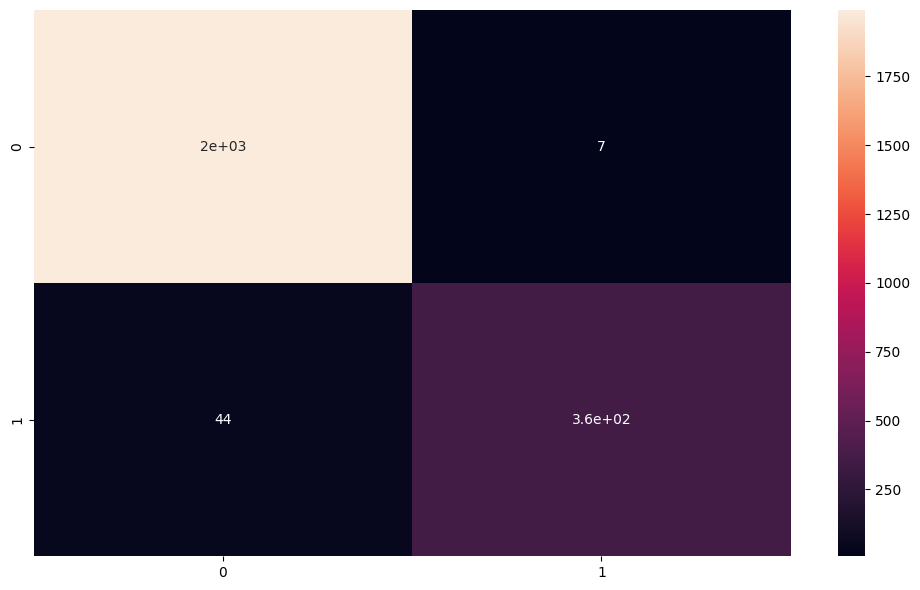

In [67]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

## Hyperparameter Tunning

In [68]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
parameter = {
    'criterion': ["gini", "entropy"],
    "n_estimators": [10, 100, 150, 200],
    "min_samples_leaf": [1, 2, 4, 6],
    "max_features": ["auto", "sqrt", "log2"]
}
kfold = StratifiedKFold(n_splits=5)
clf = GridSearchCV(ranForest, parameter, scoring="accuracy", n_jobs=2, cv=kfold)
clf.fit(X_train, y_train)
clf.get_params()
clf.best_params_
clf.best_score_
clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9787411421425594

### Save Model

In [69]:
import pickle

In [70]:
with open("model.pkl", "wb") as model_file:
  pickle.dump(clf, model_file)